# KNN With Python

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# GET DATA

In [4]:
df = pd.read_csv("Data_Knn.txt")

In [5]:
df.head()

Age of patient  year of operation  Number of positive axillary  \
0              30                 64                            1   
1              30                 62                            3   
2              30                 65                            0   
3              31                 59                            2   
4              31                 65                            4   

   Survival status  
0                1  
1                1  
2                1  
3                1  
4                1

# Standardize The Cell

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('Survival status',axis=1))

c:\users\ayush sengar\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaled_features = scaler.transform(df.drop('Survival status',axis=1))

c:\users\ayush sengar\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [10]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

Age of patient  year of operation  Number of positive axillary
0       -2.082140           0.353584                    -0.421592
1       -2.082140          -0.262921                    -0.142959
2       -2.082140           0.661837                    -0.560909
3       -1.989426          -1.187680                    -0.282275
4       -1.989426           0.661837                    -0.003642

# Splitting Data

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Survival status'],
                                                    test_size=0.20)

# Using KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [13]:
pred = knn.predict(X_test)

# Prediction And Evaluation

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(confusion_matrix(y_test,pred))

[[35 12]
 [10  5]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.78      0.74      0.76        47
           2       0.29      0.33      0.31        15

   micro avg       0.65      0.65      0.65        62
   macro avg       0.54      0.54      0.54        62
weighted avg       0.66      0.65      0.65        62



# Choosing A K-Value

In [17]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

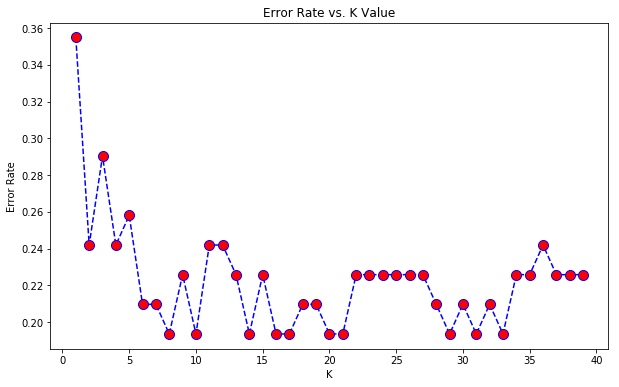

In [18]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [19]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[35 12]
 [10  5]]


              precision    recall  f1-score   support

           1       0.78      0.74      0.76        47
           2       0.29      0.33      0.31        15

   micro avg       0.65      0.65      0.65        62
   macro avg       0.54      0.54      0.54        62
weighted avg       0.66      0.65      0.65        62



In [22]:
# NOW WITH K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=10


[[47  0]
 [12  3]]


              precision    recall  f1-score   support

           1       0.80      1.00      0.89        47
           2       1.00      0.20      0.33        15

   micro avg       0.81      0.81      0.81        62
   macro avg       0.90      0.60      0.61        62
weighted avg       0.85      0.81      0.75        62

